## Multiple linear regression using Hilbert transform

Written by Abirlal Metya, Panini Dasgupta, Manmeet Singh (25/12/2019)

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp
import hilbert_data1_panini_20CRV3
import datetime


import statsmodels.api as sm

Read Data

In [2]:
x_train,y_train,_ = hilbert_data1_panini_20CRV3.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test2,y_test2,_ = hilbert_data1_panini_20CRV3.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))
x_test,y_test,_ = hilbert_data1_panini_20CRV3.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))


In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((10839, 24), (10839, 1), (1266, 24), (1266, 1))

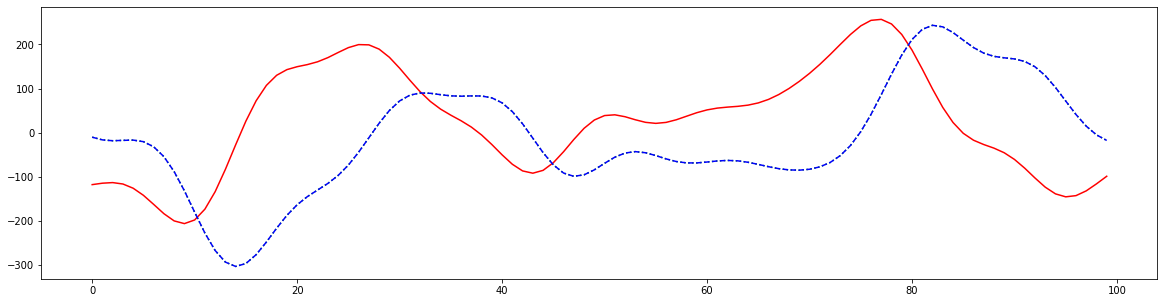

In [4]:
import matplotlib.pyplot as plt#plot the first image in the dataset
from scipy.signal import hilbert
plt.figure(figsize=[20,5])
#plt.imshow(xtrain[1,:,:,0])
plt.plot(np.arange(100),x_train.iloc[0:100,0],'-r')
plt.plot(np.arange(100),np.imag(hilbert(x_train.iloc[:,0])[0:100]),':g')
plt.plot(np.arange(100),x_train.iloc[0:100,12],'--b')

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


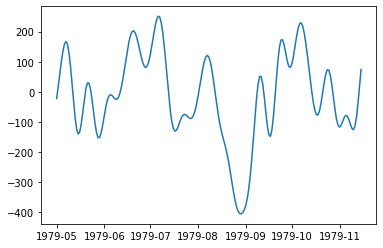

In [5]:
plt.plot(x_train.iloc[1:200,2])

In [6]:
from sklearn import linear_model

In [7]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [8]:
lm.intercept_

array([0.00216041])

In [10]:
predictions.shape

(1266, 1)

In [11]:
(lm.score(x_train.values,y_train.values))**0.5

0.8417668144353814

In [32]:
predictions = lm.predict(x_test.values)
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.        , 0.84326836],
       [0.84326836, 1.        ]])

In [30]:
predictions2 = lm.predict(x_test2.values)
np.corrcoef(predictions2[:,0],y_test2.values[:,0])

array([[1.        , 0.79541626],
       [0.79541626, 1.        ]])

Plot different columns

In [13]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [14]:
x_test3 = hilbert_data1_panini_20CRV3.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions_test.std()
rmm1_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm1_predict.to_csv('rmm1_MLR_org.txt')

In [29]:
# print(np.corrcoef(y_test2.values.squeeze(),rmm1_predict.loc['2009-04-30':'2015-12-31'].values.squeeze())[0,1])
# # y_test2.values.squeeze()

0.7923933193043348


#### MLP

## RMM2

In [33]:
x_train,_,y_train = hilbert_data1_panini_20CRV3.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,_,y_test = hilbert_data1_panini_20CRV3.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))


In [34]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)
lm.intercept_

array([-0.00576935])

In [35]:
(lm.score(x_train.values,y_train.values))**0.5

0.8369828397045571

In [36]:
predictions = lm.predict(x_test.values)
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.        , 0.80428292],
       [0.80428292, 1.        ]])

In [37]:
predictions2 = lm.predict(x_test2.values)
np.corrcoef(predictions2[:,0],y_test2.values[:,0])

array([[1.        , 0.02976006],
       [0.02976006, 1.        ]])

In [38]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [26]:
x_test3 = hilbert_data1_panini_20CRV3.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions_test.std()
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_MLR_org.txt')